In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

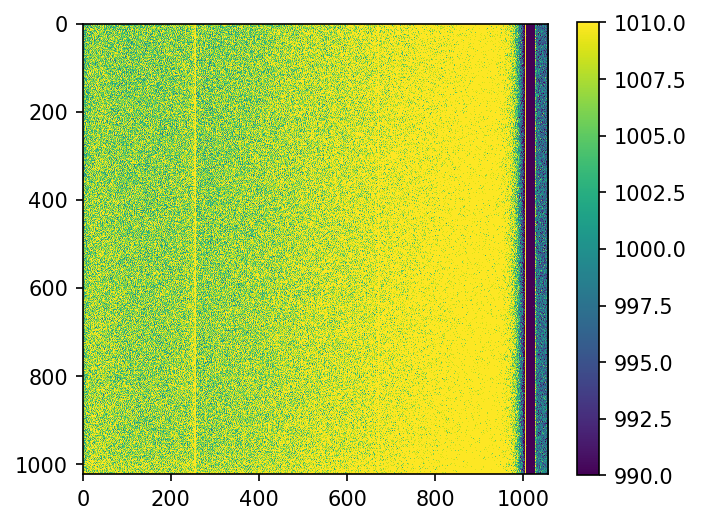

In [16]:
BIAS=[]
for i in range(5):
    bias=fits.open('./Pluto/d'+str(1071+i)+'.fits')
    BIAS.append(bias[0].data)
    bias.close()
plt.figure(figsize=(5,4),dpi=150)
BIAS_m=np.median(BIAS,axis=0)
plt.imshow(BIAS_m,vmin=990,vmax=1010)
plt.colorbar()

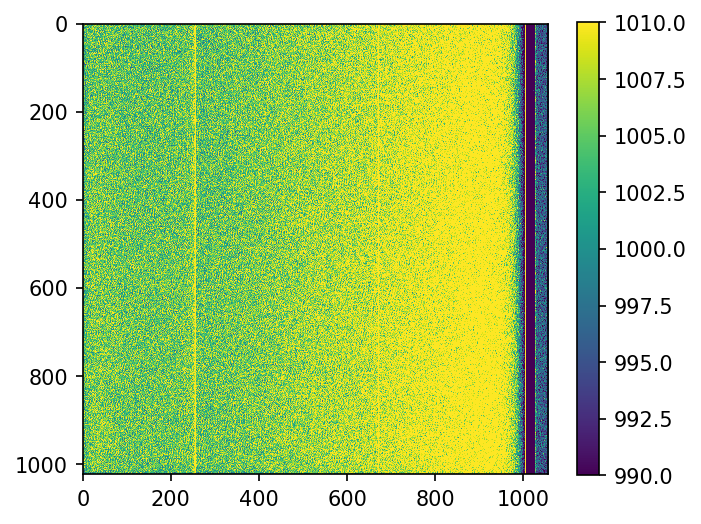

In [17]:
DARK=[]
for i in range(5):
    dark=fits.open('./Pluto/d'+str(1076+i)+'.fits')
    DARK.append(dark[0].data)
    dark.close()
DARK_m=np.median(DARK,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(DARK_m,vmin=990,vmax=1010)
plt.colorbar()

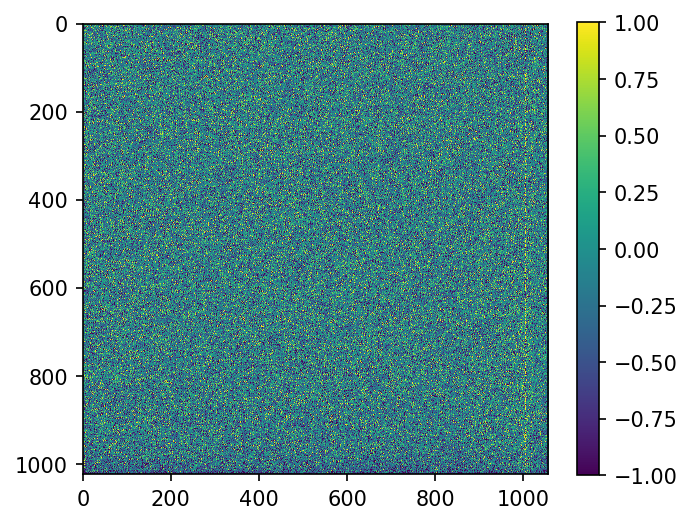

In [21]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow((DARK_m-BIAS_m)/10,vmin=-1,vmax=1)
plt.colorbar()

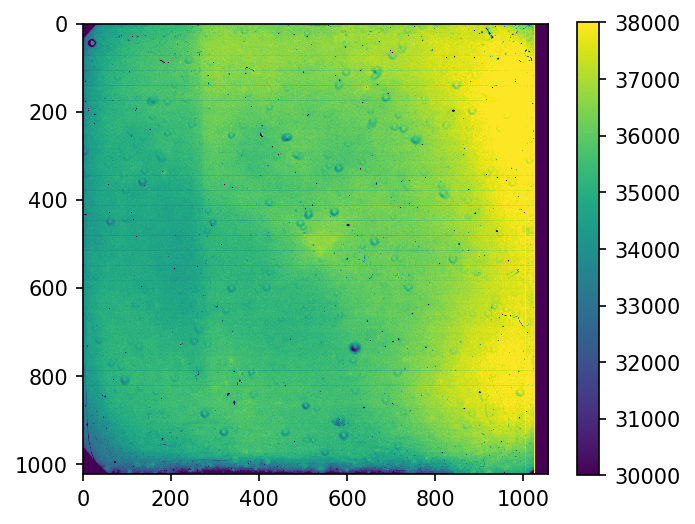

In [29]:
FLAT=[]
for i in range(5):
    flat=fits.open('./Pluto/d'+str(1081+i)+'.fits')
    FLAT.append(flat[0].data)
    flat.close()
FLAT_m=np.median(FLAT,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(FLAT_m,vmin=30000,vmax=38000)
plt.colorbar()

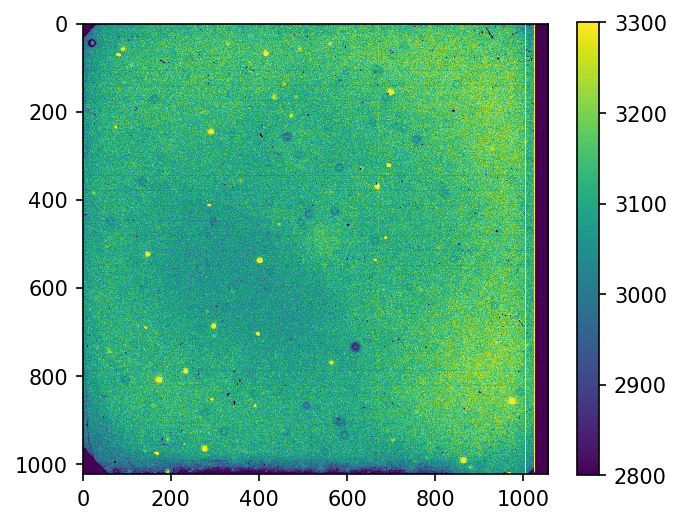

In [37]:
FLAT_sky=[]
for i in range(5):
    flat=fits.open('./Pluto/d'+str(1142+i)+'.fits')
    FLAT_sky.append(flat[0].data)
    flat.close()
FLAT_sky_m=np.median(FLAT_sky,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(FLAT_sky_m,vmin=2800,vmax=3300)
plt.colorbar()

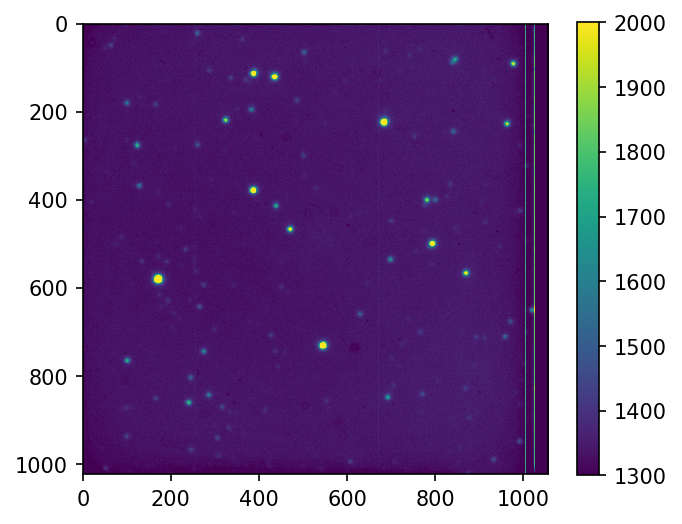

In [43]:
SCI=[]
for i in range(7):
    sci=fits.open('./Pluto/d'+str(1157+i)+'.fits')
    SCI.append(sci[0].data)
    sci.close()
SCI_m=np.median(SCI,axis=0)
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_m,vmin=1300,vmax=2000)
plt.colorbar()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


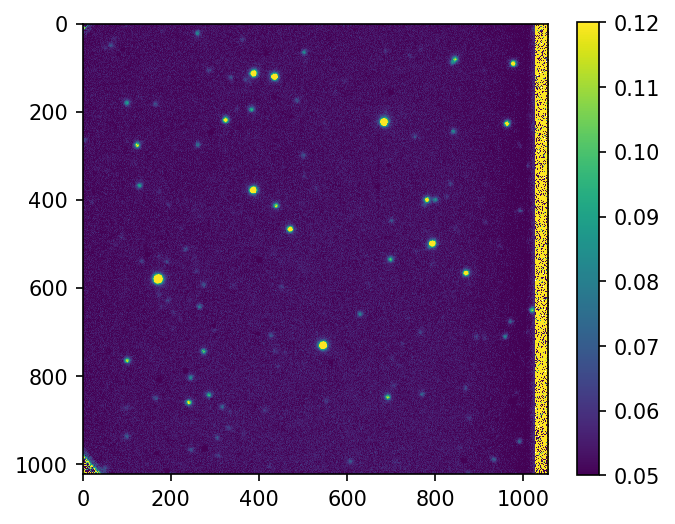

In [95]:
plt.figure(figsize=(5,4),dpi=150)
SCI_final=((SCI_m-BIAS_m)/30-(DARK_m-BIAS_m)/10)/(FLAT_sky_m/10-DARK_m/10)
plt.imshow(SCI_final,vmin=0.05,vmax=0.12)
plt.colorbar()

SCI_final_day1=fits.PrimaryHDU(SCI_final)
SCI_final_day1.writeto('Day1.fits',overwrite=True)

In [56]:
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip
from photutils import SExtractorBackground
from photutils import CircularAperture
from photutils import DAOStarFinder

from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

0.053019381707512414


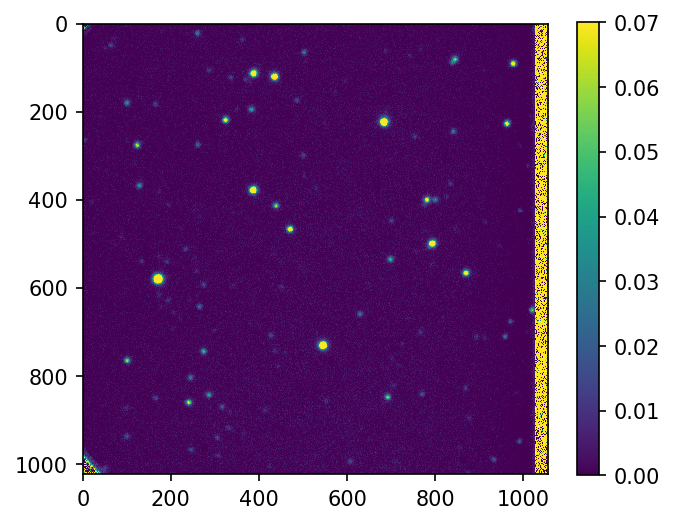

In [97]:
bkg=SExtractorBackground(SigmaClip(sigma=3.0))
bkg_value=bkg.calc_background(SCI_final)
mean,median,std=sigma_clipped_stats(SCI_final,sigma=3.0)
print(median)
SCI_final_no_bkg=SCI_final-median
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_final_no_bkg,vmin=0,vmax=0.07)
plt.colorbar()

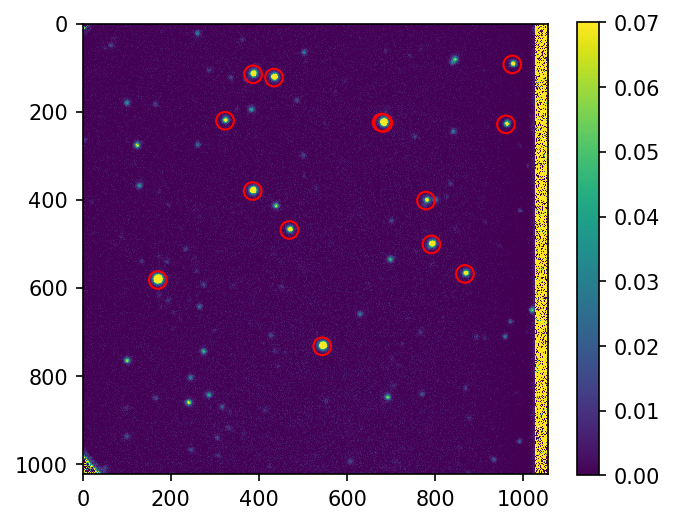

In [80]:
daofind=DAOStarFinder(fwhm=5,threshold=20*std,exclude_border=True)#,roundhi=0.5)
mask=np.zeros(SCI_final_no_bkg.shape,dtype=bool)
mask[0:1024,1000:1060]=True
mask[0:1024,0:100]=True
sources=daofind(SCI_final_no_bkg,mask=mask)
positions=np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures=CircularAperture(positions,r=20.)
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(SCI_final_no_bkg,vmin=0,vmax=0.07)
apertures.plot(color='r',lw=1)
plt.colorbar()